In [52]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [53]:
import matplotlib.pyplot as plt

In [54]:
import pandas as pd

In [64]:
df=pd.read_csv('TSLA.csv')

In [65]:
df1=df.reset_index()

In [66]:
df1.sort_values('index',inplace=True,ascending=False)

In [67]:
df1

,index,Date,Close/Last,Volume,Open,High,Low
1257,1257,12/09/2016,$38.436,13604685,$38.174,$38.7672,$38.162
1256,1256,12/12/2016,$38.486,12182140,$38.56,$38.884,$38.208
1255,1255,12/13/2016,$39.63,34096610,$38.636,$40.256,$38.6
1254,1254,12/14/2016,$39.738,20736570,$39.748,$40.6,$39.352
1253,1253,12/15/2016,$39.516,16093265,$39.682,$40.148,$39.478
...,...,...,...,...,...,...,...
4,4,12/02/2021,$1084.6,24371620,$1099.06,$1113,$1056.65
3,3,12/03/2021,$1014.97,30774000,$1084.79,$1090.5753,$1000.21
2,2,12/06/2021,$1009.01,27221040,$1001.51,$1021.64,$950.5
1,1,12/07/2021,$1051.75,18694860,$1044.2,$1057.6739,$1026.81


In [68]:
df1['Close/Last']=df1['Close/Last'].apply(lambda x:x.split('$')[1])

In [69]:
df1['Close/Last']=df1['Close/Last'].astype(float)

In [70]:
df2 = df1.reset_index()['Close/Last']

In [71]:
df2

0         38.436
1         38.486
2         39.630
3         39.738
4         39.516
          ...   
1253    1084.600
1254    1014.970
1255    1009.010
1256    1051.750
1257    1068.960
Name: Close/Last, Length: 1258, dtype: float64

In [72]:
df2.shape

(1258,)

Text(0.5, 1.0, 'TSLA Price 5 year data')

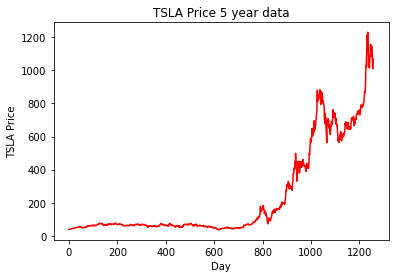

In [73]:
plt.plot(df2,color = 'red')
plt.xlabel('Day')
plt.ylabel('TSLA Price')
plt.title('TSLA Price 5 year data')

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
df2 = scaler.fit_transform(array(df2).reshape(-1,1))

In [77]:
df2

array([[0.00221252],
       [0.00225439],
       [0.00321242],
       ...,
       [0.8150096 ],
       [0.85080176],
       [0.8652141 ]])

In [78]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [79]:
X,y=split_sequence(df2,3)

In [80]:
X

array([[[0.00221252],
        [0.00225439],
        [0.00321242]],

       [[0.00225439],
        [0.00321242],
        [0.00330286]],

       [[0.00321242],
        [0.00330286],
        [0.00311695]],

       ...,

       [[0.88702103],
        [0.87831165],
        [0.82000074]],

       [[0.87831165],
        [0.82000074],
        [0.8150096 ]],

       [[0.82000074],
        [0.8150096 ],
        [0.85080176]]])

In [81]:
y

array([[0.00330286],
       [0.00311695],
       [0.00393932],
       ...,
       [0.8150096 ],
       [0.85080176],
       [0.8652141 ]])

In [82]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [83]:
model.fit(X, y, epochs=200, verbose=0)

In [84]:
x_test=array([1009.010,1051.750,1068.960])

In [85]:
x_test = scaler.fit_transform(x_test.reshape(-1,1))

In [86]:
x_test.shape

(3, 1)

In [87]:
x_test = x_test.reshape((1, 3, 1))

In [88]:
x_test.shape

(1, 3, 1)

In [89]:
x_test

array([[[0.        ],
        [0.71292744],
        [1.        ]]])

In [90]:
y_hat=model.predict(x_test,verbose=0)

In [91]:
y_hat

array([[0.72078764]], dtype=float32)

In [92]:
scaler.inverse_transform(y_hat)

array([[1052.2212]], dtype=float32)